In [10]:
import numpy as np
import configs
import utils
from matplotlib import pyplot as plt

引用库

In [11]:
female_male=configs.initial_female_male
State_male=np.zeros(configs.Max_age)
State_female=np.zeros(configs.Max_age)
Y=np.zeros(configs.Max_impacts)
P_male=np.zeros([configs.Max_age,configs.Max_age])
P_female=np.zeros([configs.Max_age,configs.Max_age])

State_male,State_female=utils.init_param(State_male,State_female)

male=[]
female=[]
total=[]

for year in range(50):
    female_male=utils.cal_male_female(State_male,State_female)
    P_male,P_female=utils.update_param(female_male,P_male,P_female)
    State_male,State_female=utils.transition(State_male,State_female,\
        P_male,P_female)
    male.append(int(np.sum(State_male)))
    female.append(int(np.sum(State_female)))
    total.append(int(np.sum(State_male))+int(np.sum(State_female)))

total_1=total

Q1 的环境

In [12]:
female_male=configs.initial_female_male
State_male=np.zeros(configs.Max_age)
State_female=np.zeros(configs.Max_age)
Y=np.zeros(configs.Max_impacts)
P_male=np.zeros([configs.Max_age,configs.Max_age])
P_female=np.zeros([configs.Max_age,configs.Max_age])
Q_male=np.zeros([configs.Max_age,configs.Max_impacts])
Q_female=np.zeros([configs.Max_age,configs.Max_impacts])

State_male,State_female=utils.init_param(State_male,State_female,\
    number=configs.initial_number_Yangtze_River,\
        female_male=configs.female_male_birth_Yangtze_River)

male=[]
female=[]
total=[]

for year in range(30):
    female_male=utils.cal_male_female(State_male,State_female)
    P_male,P_female=utils.update_param(female_male,P_male,P_female,survive_index=1,\
        pollution_impact=configs.water_pollution_survive_rate,\
            noise_impact=configs.water_noise_survive_rate,\
                artificial_impact=configs.artificial_survive_rate)
    State_male,State_female=utils.transition(State_male,State_female,\
        P_male,P_female,female_birth=configs.female_male_birth_Yangtze_River)
    male.append(int(np.sum(State_male)))
    female.append(int(np.sum(State_female)))
    total.append(int(np.sum(State_male))+int(np.sum(State_female)))

total_2=total

Q2 的环境

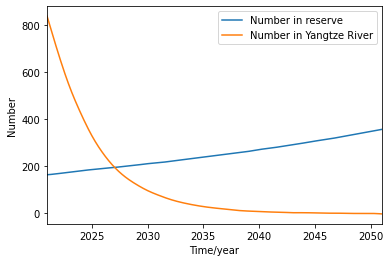

In [14]:
plt.xlabel('Time/year')
plt.ylabel('Number')
utils.draw_smooth_graph(total_1,name='Number in reserve',start_year=2015)
utils.draw_smooth_graph(total_2,name='Number in Yangtze River',start_year=2021)
plt.legend()
plt.savefig('.\\pic\\Q3_长江和保护区的对比_Version_0.1.png')